In [5]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [6]:
print("train has {} rows and {} columns".format(*train.shape))
print("test has {} rows and {} columns".format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The training data is inconsistent in some columns. Clean up the data so that it is easier to parse

In [10]:
train = train.dropna(subset=["Embarked"])
train = train.drop("Cabin", axis=1)
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

In [11]:
print("there are {}, {}, {} uniqe passenger ids, names, tickets".format(train["PassengerId"].nunique(), train["Name"].nunique(), train["Ticket"].nunique()))

there are 889, 889, 680 uniqe passenger ids, names, tickets


Since there are so many unique values, it will cause the algroithm to "memorize" the data rather than learn from it.

In [12]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Many ML algortihms work with numbers only. If we want to use textual data then it has to be encoded. Scikit-Learn has a transformer that can do this for us

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
  le.fit(train[col])
  train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


ML algorithms usually work with numbers with identical scale. Since our columns have much different scales (0-3 vs age and fare) we need to normalize the data. The following is called min-max-scaling

In [14]:
print('max age is {}'.format(train["Age"].max()))
print('max fare is {}'.format(train["Fare"].max()))

max age is 80.0
max fare is 512.3292


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('the min value is {} and max is {}'.format(train.min(), train.max()))

the min value is 0.0 and max is 1.0


Since kaggle (where I got the data from) is the one with the survived values for the test data set, we have to create our own test data set to perform our own validation.

In [16]:
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
  input_data,
  labels,
  test_size=0.2
)

print('we have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('there are {} input columns'.format(train_input.shape[1]))

we have 711 training and 178 testing rows
there are 7 input columns


In [17]:
import numpy as np

with open('./data/train.npy', 'wb') as f:
  np.save(f, train_input)
  np.save(f, train_labels)

with open('./data/test.npy', 'wb') as f:
  np.save(f, test_input)
  np.save(f, test_labels)

Just for comparisons sake, lets just randomly guess to predict the survival of a given passenger

In [18]:
import random
random.seed(a=None, version=2)

def classify(passenger):
  return random.randint(0, 1)

def run(f_classify, x):
  return list(map(f_classify, x))

In [19]:
result = run(classify, train_input)
print(result)

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

In [20]:
def evaluate(predictions, actual):
  correct = list(filter(
    lambda item: item[0] == item[1],
    list(zip(predictions, actual))
  ))
  return '{} correct predictions out of {}. Accuracy {:.0f} %'.format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

355 correct predictions out of 711. Accuracy 50 %


In [21]:
def predict_death(item):
  return 0

print(evaluate(run(predict_death, train_input), train_labels))

446 correct predictions out of 711. Accuracy 63 %


In [22]:
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[446,   0],
       [265,   0]])

In [23]:
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'.format(precision_score(train_labels, predictions, zero_division=0)))

The precision score of the predict_death classifier is 0.0


In [24]:
from sklearn.metrics import recall_score
print('The recall score of the predict_deathc classifier is {}'.format(recall_score(train_labels, predictions)))

The recall score of the predict_deathc classifier is 0.0


In [25]:
def specificity(matrix):
  return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
  return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('the specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

the specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.63


In [26]:
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

def calc_scores(train_labels, predictions, cm):
  print('The precision score of random is {:.2f}'.format(precision_score(train_labels, predictions)))
  print('The recall score of random is {:.2f}'.format(recall_score(train_labels, predictions)))
  print('The specificity score of random is {:.2f}'.format(specificity(cm)))
  print('The npv score of random is {:.2f}'.format(npv(cm)))

calc_scores(train_labels, random_predictions, random_cm)

The precision score of random is 0.37
The recall score of random is 0.50
The specificity score of random is 0.49
The npv score of random is 0.62


How do we identify a classifier that provides no value

In [27]:
# weight is a value between -1 and 1. it denotes the tendency to predict death (negatives) or survival (positives)
def hypocrite(passenger, weight):
  return round(min(1, max(0, weight*0.5+random.uniform(0, 1))))

In [28]:
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

calc_scores(train_labels, w_predictions, w_cm)

The precision score of random is 0.37
The recall score of random is 0.23
The specificity score of random is 0.77
The npv score of random is 0.63


In [29]:
# number of steps between -1 and 1
cnt_steps = 40

# list of the step numbers
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [-1, -0.95, ..., 0.95, 1]
weights = list(map(
  lambda weight: round(weight, 2),
  np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

# list of predictions at every step
l_predictions = list(map(
  lambda step: run(
    lambda passenger: hypocrite(passenger, weights[step]),
    train_input
  ),
  steps
))

l_cm = list(map(
  lambda step: confusion_matrix(train_labels, l_predictions[step]),
  steps
))

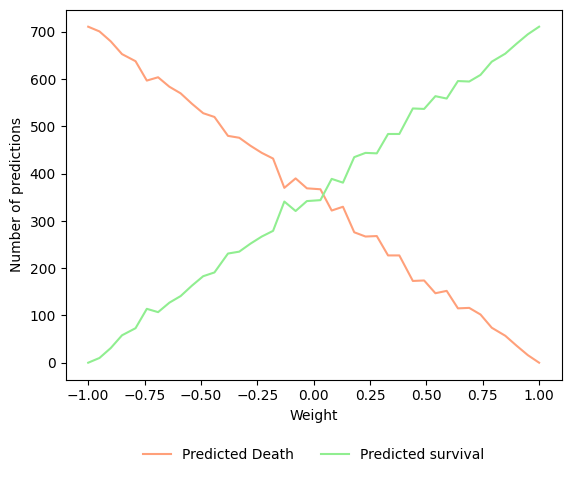

In [30]:
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
  weights, # point at x-axis
  list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
  'lightsalmon', #color of the graph
  label='Predicted Death'
)

# create a graph for the number of predicted survivals 
survivals, = plt.plot(
  weights, #point at x-axis
  list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
  'lightgreen', # color of the graph
  label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
  bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

The above graph is called a "Hypocrite Classifier" (i think) comfirms that the tendency of predictions is changed depending on the weight. At weight -1 it always predicts death, at weight 0.5 it's 50:50 and at weight 1 it always predicts survival.

In [34]:
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]), steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]), steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/root/anaconda3/envs/qiskit/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


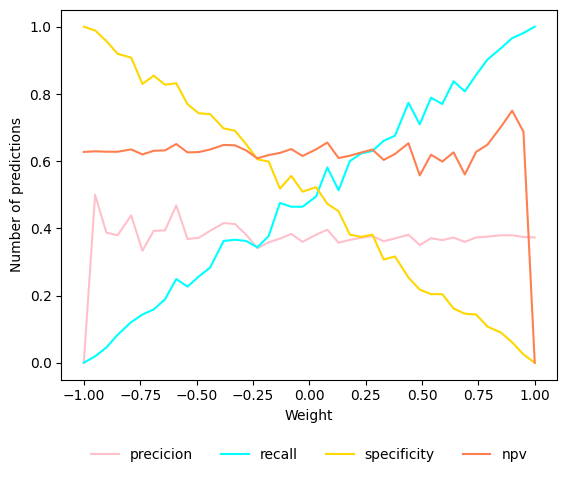

In [37]:
m_precicion, = plt.plot(weights, l_precision, 'pink', label='precicion')
m_recall, = plt.plot(weights, l_recall, 'cyan', label='recall')
m_specificity, = plt.plot(weights, l_specificity, 'gold', label='specificity')
m_npv, = plt.plot(weights, l_npv, 'coral', label='npv')

plt.legend(
  handles=[m_precicion, m_recall, m_specificity, m_npv],
  loc='upper center',
  bbox_to_anchor=(0.5, -0.15),
  framealpha=0.0,
  ncol=4
)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

The above graph shows that `specificity` and `recall` are directly related to the classifier's tendency to predict death. The values for `precision` and `npv` are closer to horizontal lines. `precision` relates to the prevalence of 39% survivals in our data and `npv` to the prevalence of 61% deaths.

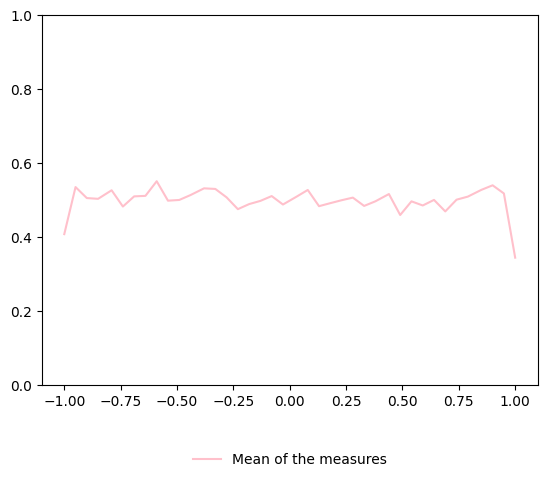

In [38]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(
  handles=[m_mean],
  loc='upper center',
  bbox_to_anchor=(0.5, -0.15),
  framealpha=0.0
)
plt.ylim(0,1)
plt.show()

When looking at the mean of all four measures, it also looks like a flat line that drops at the edges. The edge drops are due to `precision` and `npv` being 0 there because there are no predicited survivals (left edge) and respectively no predicted deaths (right edge) to calculate some measure.

This line indicates that the level of information gained by all hypocrite classifiers is equal and around 0.5. That is the baseline for a binary classifier. Some hypocrite classifiers are able to artificially increase certain single measures (`accuracy`, `recall`, etc.) by explointing the prevalence. When looking at all measures together we can unmask the hypocrite classifier.

However, the mean of these measures is not necessarily the best way to evaluate performance of your classifier. Depending on the task you might favor one measure over another but you should look at the overall level of information provided by the classifier. Don't be tricked by one classifier's performance in a single category.

In [39]:
def classifier_report(name, run, classify, input, labels):
  cr_predictions = run(classify, input)
  cr_cm = confusion_matrix(labels, cr_predictions)
  
  cr_precision = precision_score(labels, cr_predictions)
  cr_recall = recall_score(labels, cr_predictions)
  cr_specificity = specificity(cr_cm)
  cr_npv = npv(cr_cm)
  cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_recall))
  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_specificity))
  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_npv))
  print('The information level is {:.2f}'.format(cr_level))

In [40]:
classifier_report(
  "Random PQC",
  run,
  classify,
  train_input,
  train_labels
)

The precision score of the Random PQC classifier is 0.38
The precision score of the Random PQC classifier is 0.52
The precision score of the Random PQC classifier is 0.49
The precision score of the Random PQC classifier is 0.63
The information level is 0.50
